In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')



In [3]:
housingData = pd.read_csv('useThisDatasetToBuildModel.csv')


In [4]:
housingData.info()
housingData.shape ## 14347 rows and 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14347 entries, 0 to 14346
Data columns (total 10 columns):
longitude           14347 non-null float64
latitude            14347 non-null float64
medianAge           14347 non-null int64
totalRooms          14347 non-null int64
bedrooms            14347 non-null int64
population          14347 non-null int64
households          14347 non-null int64
medianIncome        14347 non-null float64
medianHouseValue    14347 non-null int64
oceanProximity      14347 non-null object
dtypes: float64(3), int64(6), object(1)
memory usage: 1.1+ MB


(14347, 10)

In [5]:
housingData.head() ## 14348 rows, including the header)

,longitude,latitude,medianAge,totalRooms,bedrooms,population,households,medianIncome,medianHouseValue,oceanProximity
0,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
1,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
2,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.84,52,2535,489,1094,514,3.6591,299200,NEAR BAY
4,-122.25,37.84,52,3104,687,1157,647,3.1200,241400,NEAR BAY


In [7]:
# Set your factors and response
factors = housingData[['longitude','latitude','medianAge','totalRooms','bedrooms','population','households','medianIncome']]
response = housingData['medianHouseValue']

In [8]:
# Build your train and test datasets
from sklearn.model_selection import train_test_split

testSize = 0.2
trainFactors, testFactors, trainResponse, testResponse = train_test_split(factors, response, test_size=testSize, random_state=42)

## Linear Support Vector Regression

In [9]:
#Import LinearSVR
from sklearn.svm import LinearSVR

In [10]:
# Define the SVR object
lin_svr = LinearSVR(random_state=42)

In [11]:
# Build the model fit using the training set
lin_svr.fit(trainFactors, trainResponse)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [12]:
# Get the response for the test set
svrResponse = lin_svr.predict(testFactors)

In [13]:
# Get rSquare Value
from sklearn.metrics import r2_score
svrR2score = r2_score(svrResponse, testResponse)
svrR2score

-2.9388177239119035

In [14]:
# Putting it all together
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
svrModel = LinearSVR(random_state=82)
svrModel.fit(trainFactors, trainResponse)
svrResponse = svrModel.predict(testFactors)
svrR2score = r2_score(svrResponse, testResponse)
svrR2score

-2.5881896974532745

In [14]:
from sklearn.ensemble import RandomForestRegressor
randomForestModel = RandomForestRegressor(n_estimators=10, min_samples_split=2, verbose = True,random_state=82)
randomForestModel.fit(trainFactors, trainResponse)
randomForestResponse = randomForestModel.predict(testFactors)
randomForestR2score = r2_score(randomForestResponse, testResponse)
randomForestR2score

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.7433564860802326

In [15]:

from sklearn.linear_model import LinearRegression

linearRegressionModel = LinearRegression()
# Train the model using the training sets
linearRegressionModel.fit(trainFactors, trainResponse)

# Make predictions using the testing set
linearRegressionResponse = linearRegressionModel.predict(testFactors)
linearRegressionR2score = r2_score(linearRegressionResponse, testResponse)
linearRegressionR2score

0.46928174710361914

In [16]:
# The coefficients
print('Coefficients: \n', linearRegressionModel.coef_)

Coefficients: 
 [-4.34137242e+04 -4.30981498e+04  1.11278633e+03 -8.66416692e+00
  1.27943164e+02 -3.64610516e+01  2.95318022e+01  4.06396688e+04]


In [17]:
spotCheck = 410
print("Linear Regression: \n Predicted Price:  {}  \n   Actual Price:  {}".format(linearRegressionResponse[spotCheck], testResponse[spotCheck]))
print("Random Forest: \n Predicted Price:  {}  \n   Actual Price:  {}".format(randomForestResponse[spotCheck], testResponse[spotCheck]))
print("SVR: \n Predicted Price:  {}  \n   Actual Price:  {}".format(svrResponse[spotCheck], testResponse[spotCheck]))


Linear Regression: 
 Predicted Price:  163479.10327106807  
   Actual Price:  330200
Random Forest: 
 Predicted Price:  216890.0  
   Actual Price:  330200
SVR: 
 Predicted Price:  125716.04043765012  
   Actual Price:  330200


In [22]:
## Rest of your code calculations go here
# your models
# Lasso Regession.

from sklearn.linear_model import Lasso

#lassoReg = Lasso(alpha=0.2, normalize=True, random_state=21) ## Gives same results even after changing alpha.
lassoReg = Lasso(random_state=20)
lassoReg.fit(trainFactors, trainResponse)

lassoResponse = lassoReg.predict(testFactors)

lassoRegR2score = r2_score(lassoResponse, testResponse)
lassoRegR2score

0.46926483159690846

In [23]:
## Ridge Regression.

from sklearn.linear_model import Ridge
#ridgeReg = Ridge(alpha=0.001, normalize=True) # It gives 0.465
ridgeReg = Ridge(random_state=21)
ridgeReg.fit(trainFactors, trainResponse)

ridgeResponse = ridgeReg.predict(testFactors)
#ridgeReg.score(testFactors,testResponse)
ridgeRegR2score = r2_score(ridgeResponse, testResponse)
ridgeRegR2score

0.469219972554515

In [15]:
## Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=10, 
                                    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                    max_features='auto', random_state=2, max_leaf_nodes=None, 
                                    min_impurity_decrease=0.01, min_impurity_split=None, presort=False)

DTregressor.fit(trainFactors,trainResponse)
DTResponse = DTregressor.predict(testFactors)
DTR2score = r2_score(DTResponse, testResponse)
DTR2score

0.6606404213379848

In [41]:
## Gradient Boosting Regressor

from sklearn import ensemble
ensemblemodel = ensemble.GradientBoostingRegressor(n_estimators=145, max_depth = 4, min_samples_split = 2,
                                                    learning_rate = 0.2, loss = 'ls', random_state=43)

ensemblemodel.fit(trainFactors, trainResponse)

ensembleResponse = ensemblemodel.predict(testFactors)
ensembleR2score = r2_score(ensembleResponse, testResponse)
ensembleR2score

0.8008472369307285

In [43]:
## ## Gradient Boosting Regressor - Tuning Parameters (to be used as Best Model)
 

ensemblemodel1 = ensemble.GradientBoostingRegressor( init=None,
 learning_rate=0.15, loss='ls', max_depth=6,
   min_samples_leaf=4, n_estimators=600,  random_state=22,
  verbose=0)


ensemblemodel1.fit(trainFactors, trainResponse)

ensembleResponse1 = ensemblemodel1.predict(testFactors)
ensembleR2score1 = r2_score(ensembleResponse1, testResponse)
ensembleR2score1

0.8247400893875617

In [ ]:
### Plotting Graph to find feature importance

Text(0,0.5,'Feature Importance Score')

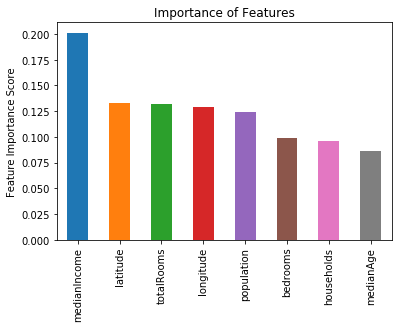

In [45]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

predictors=list(trainFactors)
feat_imp = pd.Series(ensemblemodel1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')


In [ ]:
## Tried to get best parameter value for tuning but didnt work..hence commenting out the code (Pls ignore)

#from sklearn.grid_search import GridSearchCV
#from sklearn.ensemble import GradientBoostingClassifier
#p_test = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250]}

#tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
#                      param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
#tuning.fit(trainFactors, trainResponse)
#tuning.grid_scores_, tuning.best_params_, tuning.best_score_

In [ ]:
## Also, used SVRregressor, DecisionTreeClassifier, AdaBoostClassifier, XGBClassifier, CatBoostClassifier 
##but results were not good. Also, CatboostError: bad allocation gave error as CatboostError: bad allocation &didnt run.


In [46]:
# Finally
housingDataToPredict = pd.read_csv('useThisDatasetToPredict.csv')
housingDataToPredict.head()

,longitude,latitude,medianAge,totalRooms,bedrooms,population,households,medianIncome,oceanProximity
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY
1,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY
2,-122.25,37.85,52,919,213,413,193,4.0368,NEAR BAY
3,-122.26,37.85,50,1120,283,697,264,2.1250,NEAR BAY
4,-122.27,37.85,52,1966,347,793,331,2.7750,NEAR BAY


In [47]:
# Get best model
# Your code goes here

bestModel = ensemble.GradientBoostingRegressor( init=None, learning_rate=0.15, loss='ls', max_depth=6,
                                                min_samples_leaf=4, n_estimators=600,  random_state=22,
                                                verbose=0)


bestModel.fit(trainFactors, trainResponse)

bestModelResponse = bestModel.predict(testFactors)
bestModelR2score = r2_score(bestModelResponse, testResponse)
bestModelR2score

0.8247400893875617

In [48]:
predictFactors = housingDataToPredict[['longitude','latitude','medianAge','totalRooms','bedrooms','population','households','medianIncome']]
predictedPrices = bestModel.predict(predictFactors)


In [49]:
predictedResults = pd.DataFrame(predictedPrices)

In [51]:
predictedResults.to_csv('finalProjectPredictions_Kartik_Athale.csv')

In [54]:
bestModel

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.15, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, presort='auto', random_state=22,
             subsample=1.0, verbose=0, warm_start=False)